# 抽象工厂模式
## 意图
抽象工厂模式是一种创建型设计模式， 它能创建一系列相关的对象， 而无需指定其具体类。

## 问题


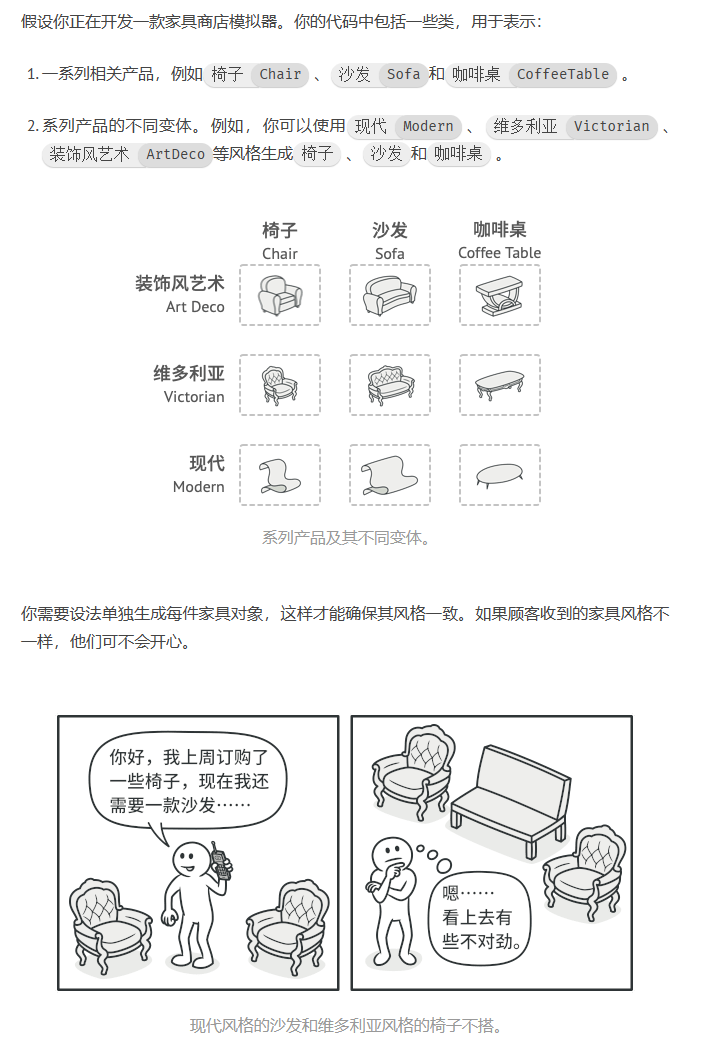

此外， 你也不希望在添加新产品或新风格时修改已有代码。 家具供应商对于产品目录的更新非常频繁， 你不会想在每次更新时都去修改核心代码的。

## 解决方案
首先， 抽象工厂模式建议为系列中的每件产品明确声明接口 （例如椅子、 沙发或咖啡桌）。 然后， 确保所有产品变体都继承这些接口。 例如， 所有风格的椅子都实现 椅子接口； 所有风格的咖啡桌都实现 咖啡桌接口， 以此类推。

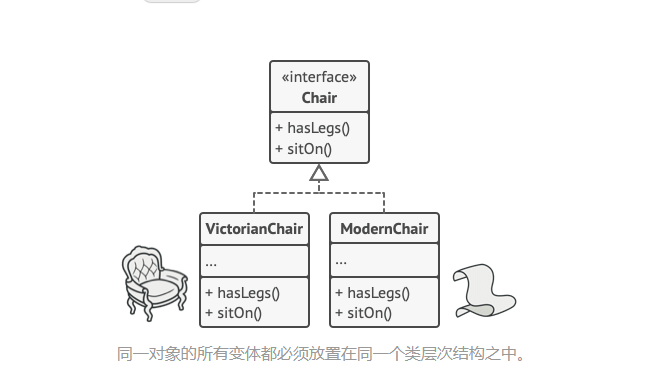

接下来， 我们需要声明抽象工厂——包含系列中所有产品构造方法的接口。 例如 create­Chair创建椅子 、 ​ create­Sofa创建沙发和 create­Coffee­Table创建咖啡桌 。 这些方法必须返回抽象产品类型， 即我们之前抽取的那些接口： ​ 椅子 ， ​ 沙发和 咖啡桌等等。

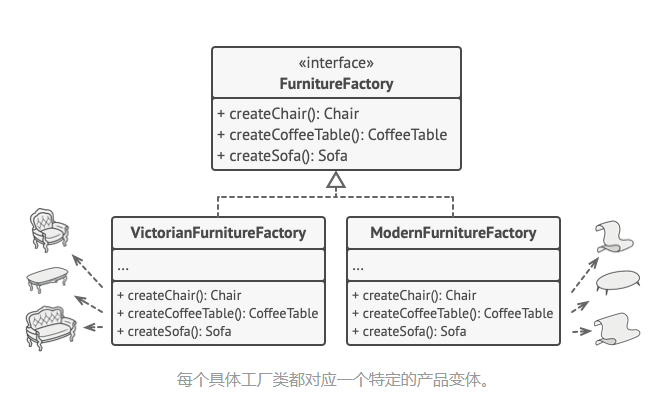

那么该如何处理产品变体呢？ 对于系列产品的每个变体， 我们都将基于 抽象工厂接口创建不同的工厂类。 每个工厂类都只能返回特定类别的产品， 例如， ​ 现代家具工厂Modern­Furniture­Factory只能创建 现代椅子Modern­Chair 、 ​ 现代沙发Modern­Sofa和 现代咖啡桌Modern­Coffee­Table对象。

客户端代码可以通过相应的抽象接口调用工厂和产品类。 你无需修改实际客户端代码， 就能更改传递给客户端的工厂类， 也能更改客户端代码接收的产品变体。

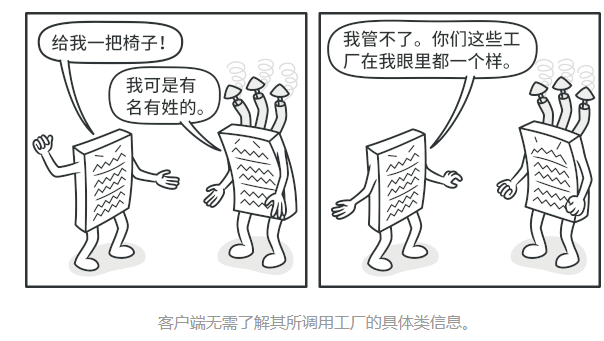

假设客户端想要工厂创建一把椅子。 客户端无需了解工厂类， 也不用管工厂类创建出的椅子类型。 无论是现代风格， 还是维多利亚风格的椅子， 对于客户端来说没有分别， 它只需调用抽象 椅子接口就可以了。 这样一来， 客户端只需知道椅子以某种方式实现了 sit­On坐下方法就足够了。 此外， 无论工厂返回的是何种椅子变体， 它都会和由同一工厂对象创建的沙发或咖啡桌风格一致。

最后一点说明： 如果客户端仅接触抽象接口， 那么谁来创建实际的工厂对象呢？ 一般情况下， 应用程序会在初始化阶段创建具体工厂对象。 而在此之前， 应用程序必须根据配置文件或环境设定选择工厂类别。

## 抽象工厂模式结构

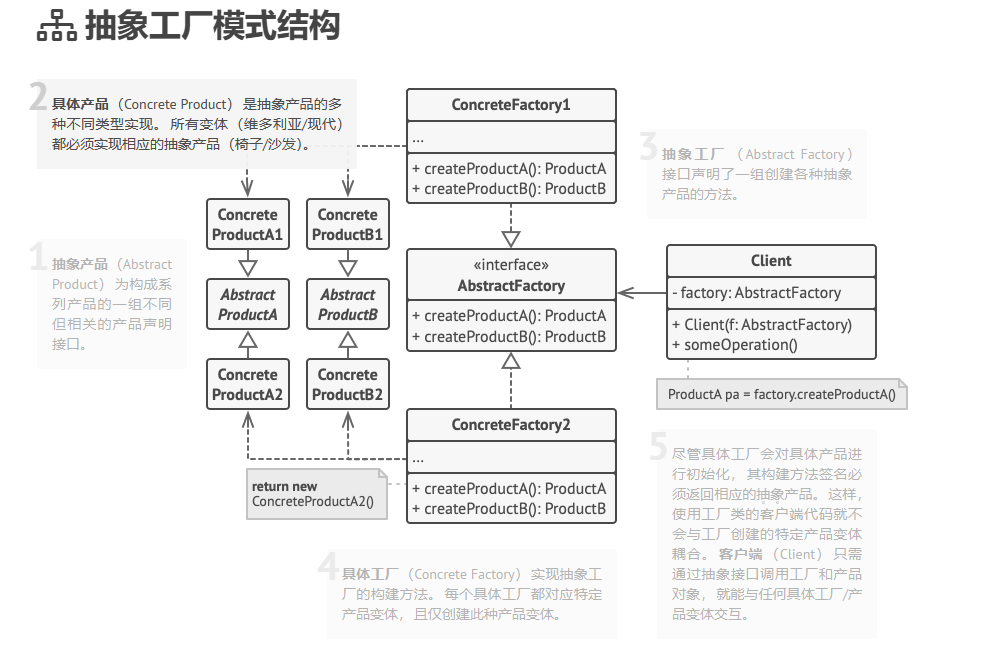

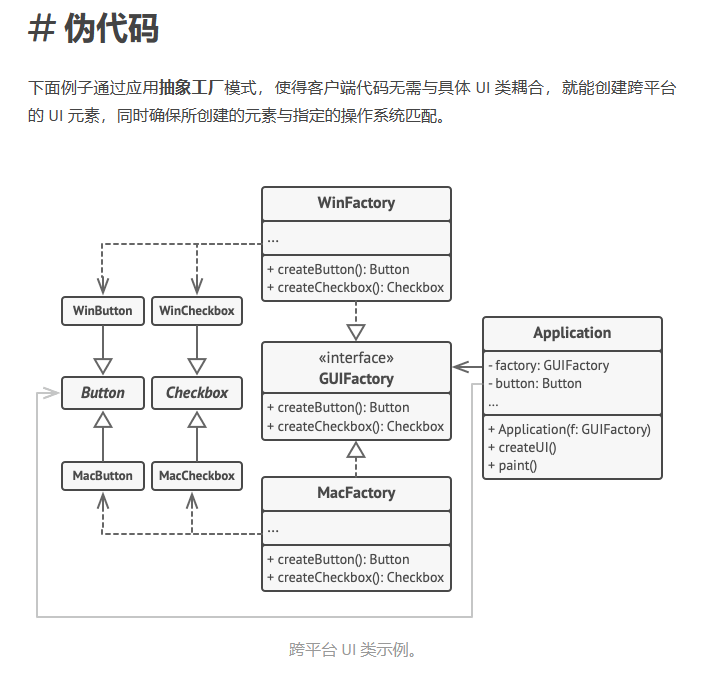

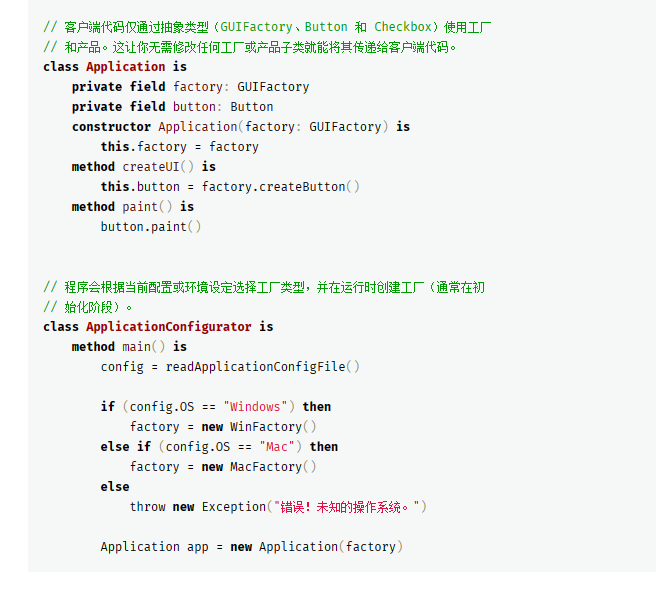

##  抽象工厂模式适合应用场景

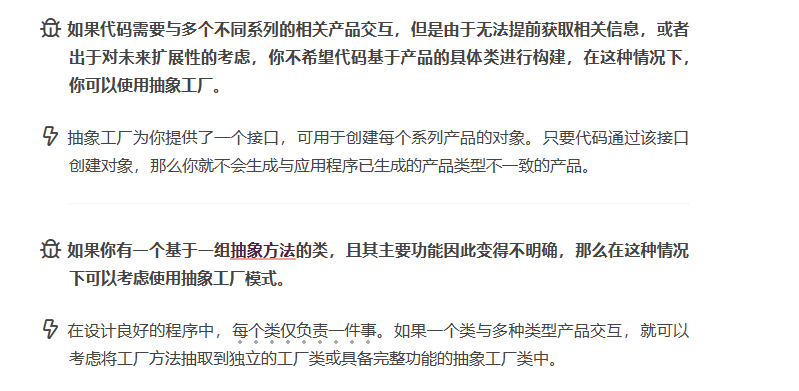

##  实现方式
以不同的产品类型与产品变体为维度绘制矩阵。

为所有产品声明抽象产品接口。 然后让所有具体产品类实现这些接口。

声明抽象工厂接口， 并且在接口中为所有抽象产品提供一组构建方法。

为每种产品变体实现一个具体工厂类。

在应用程序中开发初始化代码。 该代码根据应用程序配置或当前环境， 对特定具体工厂类进行初始化。 然后将该工厂对象传递给所有需要创建产品的类。

找出代码中所有对产品构造函数的直接调用， 将其替换为对工厂对象中相应构建方法的调用。

## 抽象工厂模式优缺点

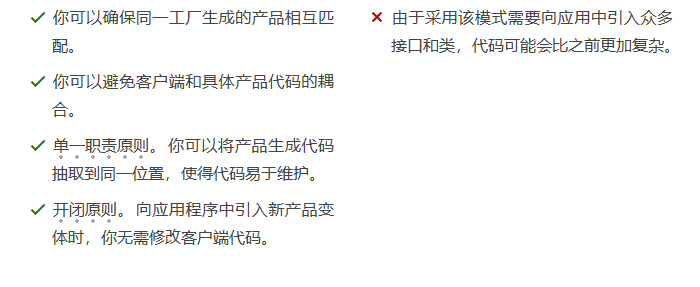

In [1]:
from __future__ import annotations
from abc import ABC, abstractmethod


class AbstractFactory(ABC):
    """
    The Abstract Factory interface declares a set of methods that return
    different abstract products. These products are called a family and are
    related by a high-level theme or concept. Products of one family are usually
    able to collaborate among themselves. A family of products may have several
    variants, but the products of one variant are incompatible with products of
    another.
    """

    @abstractmethod
    def create_product_a(self) -> AbstractProductA:
        pass

    @abstractmethod
    def create_product_b(self) -> AbstractProductB:
        pass


class ConcreteFactory1(AbstractFactory):
    """
    Concrete Factories produce a family of products that belong to a single
    variant. The factory guarantees that resulting products are compatible. Note
    that signatures of the Concrete Factory's methods return an abstract
    product, while inside the method a concrete product is instantiated.
    """

    def create_product_a(self) -> AbstractProductA:
        return ConcreteProductA1()

    def create_product_b(self) -> AbstractProductB:
        return ConcreteProductB1()


class ConcreteFactory2(AbstractFactory):
    """
    Each Concrete Factory has a corresponding product variant.
    """

    def create_product_a(self) -> AbstractProductA:
        return ConcreteProductA2()

    def create_product_b(self) -> AbstractProductB:
        return ConcreteProductB2()


class AbstractProductA(ABC):
    """
    Each distinct product of a product family should have a base interface. All
    variants of the product must implement this interface.
    """

    @abstractmethod
    def useful_function_a(self) -> str:
        pass


"""
Concrete Products are created by corresponding Concrete Factories.
"""


class ConcreteProductA1(AbstractProductA):
    def useful_function_a(self) -> str:
        return "The result of the product A1."


class ConcreteProductA2(AbstractProductA):
    def useful_function_a(self) -> str:
        return "The result of the product A2."


class AbstractProductB(ABC):
    """
    Here's the the base interface of another product. All products can interact
    with each other, but proper interaction is possible only between products of
    the same concrete variant.
    """

    @abstractmethod
    def useful_function_b(self) -> None:
        """
        Product B is able to do its own thing...
        """
        pass

    @abstractmethod
    def another_useful_function_b(self, collaborator: AbstractProductA) -> None:
        """
        ...but it also can collaborate with the ProductA.

        The Abstract Factory makes sure that all products it creates are of the
        same variant and thus, compatible.
        """
        pass


"""
Concrete Products are created by corresponding Concrete Factories.
"""


class ConcreteProductB1(AbstractProductB):
    def useful_function_b(self) -> str:
        return "The result of the product B1."

    """
    The variant, Product B1, is only able to work correctly with the variant,
    Product A1. Nevertheless, it accepts any instance of AbstractProductA as an
    argument.
    """

    def another_useful_function_b(self, collaborator: AbstractProductA) -> str:
        result = collaborator.useful_function_a()
        return f"The result of the B1 collaborating with the ({result})"


class ConcreteProductB2(AbstractProductB):
    def useful_function_b(self) -> str:
        return "The result of the product B2."

    def another_useful_function_b(self, collaborator: AbstractProductA):
        """
        The variant, Product B2, is only able to work correctly with the
        variant, Product A2. Nevertheless, it accepts any instance of
        AbstractProductA as an argument.
        """
        result = collaborator.useful_function_a()
        return f"The result of the B2 collaborating with the ({result})"


def client_code(factory: AbstractFactory) -> None:
    """
    The client code works with factories and products only through abstract
    types: AbstractFactory and AbstractProduct. This lets you pass any factory
    or product subclass to the client code without breaking it.
    """
    product_a = factory.create_product_a()
    product_b = factory.create_product_b()

    print(f"{product_b.useful_function_b()}")
    print(f"{product_b.another_useful_function_b(product_a)}", end="")


if __name__ == "__main__":
    """
    The client code can work with any concrete factory class.
    """
    print("Client: Testing client code with the first factory type:")
    client_code(ConcreteFactory1())

    print("\n")

    print("Client: Testing the same client code with the second factory type:")
    client_code(ConcreteFactory2())

Client: Testing client code with the first factory type:
The result of the product B1.
The result of the B1 collaborating with the (The result of the product A1.)

Client: Testing the same client code with the second factory type:
The result of the product B2.
The result of the B2 collaborating with the (The result of the product A2.)